In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
from scipy.stats import f_oneway
from scipy.stats import pearsonr

In [2]:
data_folder_path = Path('../../data/')
print(os.listdir(data_folder_path))

['data_train_all_columns.csv', 'chordonomicon_raw.csv', 'final_test.csv', 'matrix_expanded_final_train.csv', 'density_expanded_final_train.csv', '.DS_Store', 'spotify_hot100.csv', 'data_train_continuous_data.csv', 'spotify_final.csv', 'clean_test_with_4_grams.csv', 'final_train.csv', 'final_train_pop.csv', 'data_train_n_grams.csv', 'data_train_all.csv', 'clean_test_with_5_grams.csv', 'clean_test_with_3_grams.csv', 'final_test_pop.csv']


In [6]:
data_all = pd.read_csv(data_folder_path / 'data_train_all.csv')
print(data_all.columns)

Index(['chords_x', 'simplified_chords_x', 'spotify_song_id', 'chords_y',
       'missing_notes', 'simplified_chords_y', 'drone_ratio',
       'average_overlap', 'average_2overlap', 'average_3overlap',
       ...
       'contains_G,C,Amin,F,G', 'contains_F,G,C,Amin,F',
       'contains_Amin,C,G,Amin,C', 'contains_D,G,C,G,C', 'contains_C,G,C,G,D',
       'contains_G,Emin,C,G,Emin', 'contains_C,Amin,C,Amin,C',
       'contains_F,Amin,G,F,Amin', 'track_id', 'on_hot100'],
      dtype='object', length=144)


In [7]:
# Identify target and predictor variables
target_variables_list = ['decade', 'main_genre', 'spotify_popularity', 'on_hot100']
predictor_variables_list = [
    'drone_ratio',
    'average_overlap',
    'average_2overlap',
    'average_3overlap',
    'average_4overlap',
    'average_5overlap',
    'maj_triad_ratio',
    'min_triad_ratio',
    'unique_5gram_density',
    'unique_chord_density'
]

In [8]:
# Check missing values in target variables
print("Missing values in target variables:")
print(data_all[target_variables_list].isnull().sum())
print("\nMissing values in predictor variables:")
print(data_all[predictor_variables_list].isnull().sum())

Missing values in target variables:
decade                    0
main_genre                0
spotify_popularity    73498
on_hot100             74447
dtype: int64

Missing values in predictor variables:
drone_ratio             0
average_overlap         0
average_2overlap        0
average_3overlap        0
average_4overlap        0
average_5overlap        0
maj_triad_ratio         0
min_triad_ratio         0
unique_5gram_density    0
unique_chord_density    0
dtype: int64


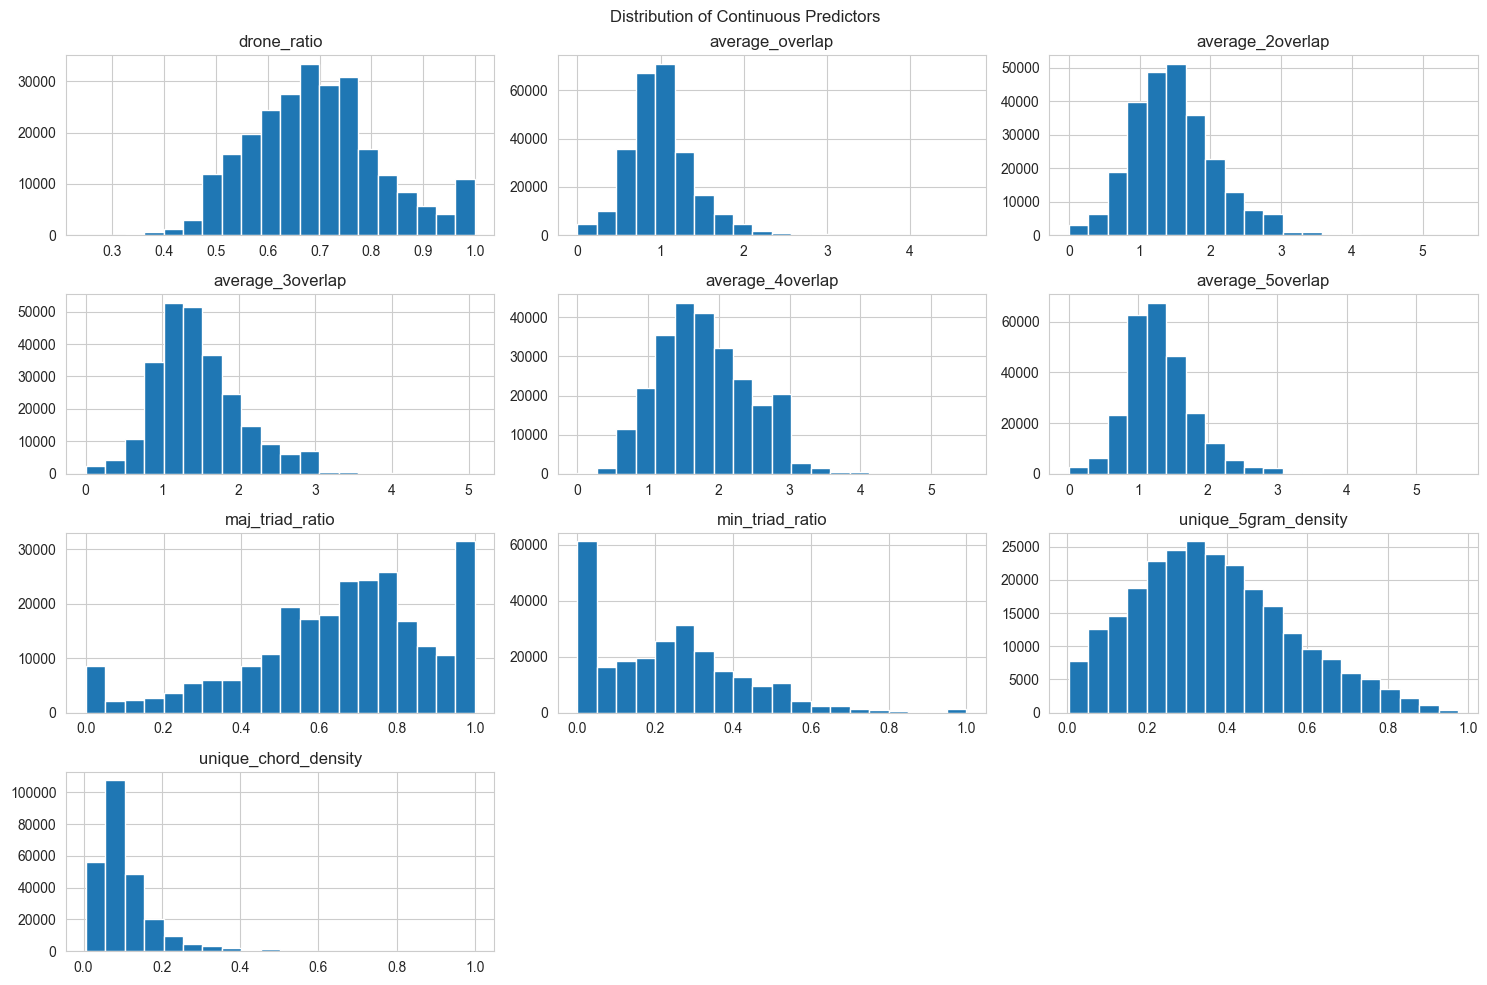

In [18]:
# Get predictor variables as a DataFrame
predictors = data_all[predictor_variables_list]

# Create histograms
predictors.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Continuous Predictors")
plt.tight_layout()
plt.show()

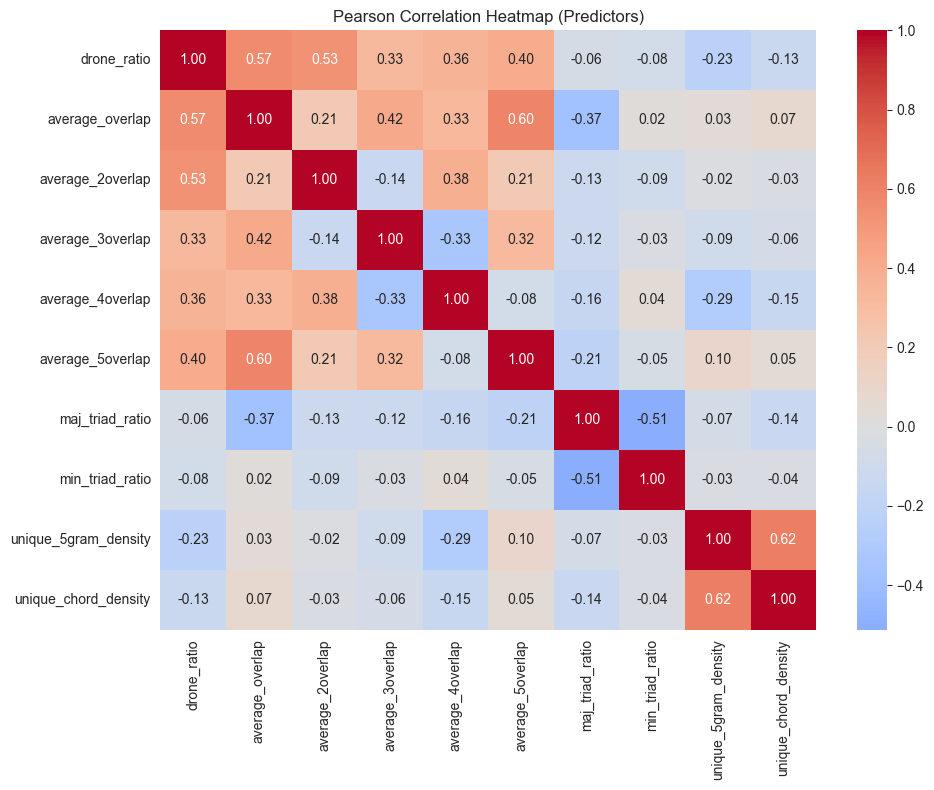

In [19]:
# Calculate correlation matrix
corr_matrix = predictors.corr(method='pearson')

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt='.2f')
plt.title("Pearson Correlation Heatmap (Predictors)")
plt.tight_layout()
plt.show()

In [20]:
# Detect multicollinearity
threshold = 0.9
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = [(i, j) for i, j in corr_pairs.index if i != j and corr_matrix.loc[i, j] > threshold]

# Remove duplicates (e.g., (A,B) and (B,A))
high_corr_pairs = list(set(tuple(sorted(pair)) for pair in high_corr_pairs))

print("\nHighly correlated pairs (>0.9):")
if high_corr_pairs:
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {corr_matrix.loc[pair[0], pair[1]]:.3f}")
else:
    print("No highly correlated pairs found.")


Highly correlated pairs (>0.9):
No highly correlated pairs found.


Target: decade

ANOVA F-statistics (categorical target):
  drone_ratio              : F= 283.95, p=0.0000
  average_overlap          : F= 247.80, p=0.0000
  average_2overlap         : F= 236.52, p=0.0000
  average_3overlap         : F= 207.82, p=0.0000
  average_4overlap         : F= 535.92, p=0.0000
  average_5overlap         : F= 100.16, p=0.0000
  maj_triad_ratio          : F= 190.15, p=0.0000
  min_triad_ratio          : F=1431.65, p=0.0000
  unique_5gram_density     : F= 779.08, p=0.0000
  unique_chord_density     : F=1253.78, p=0.0000


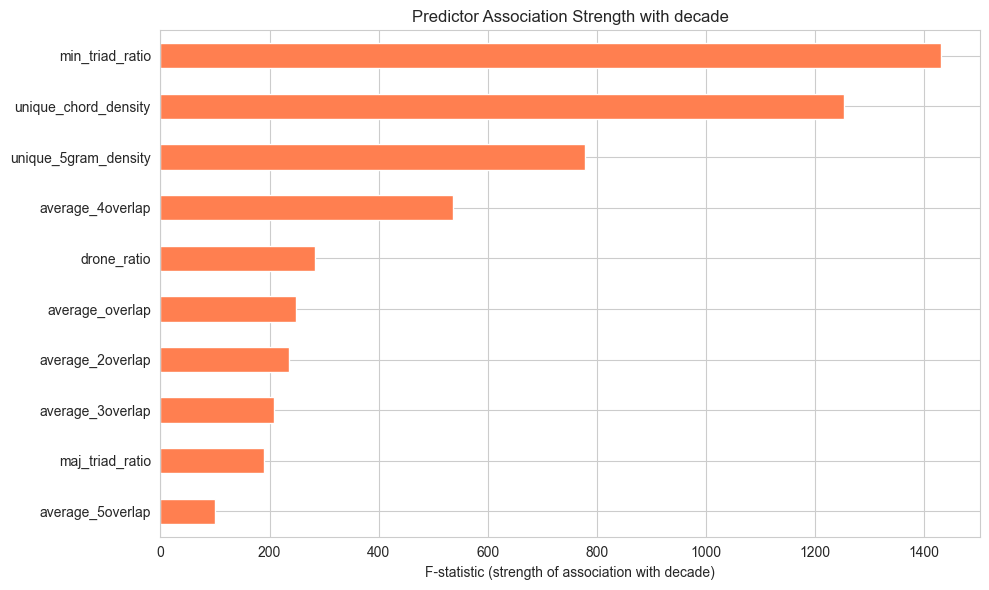

Target: main_genre

ANOVA F-statistics (categorical target):
  drone_ratio              : F= 550.12, p=0.0000
  average_overlap          : F= 501.36, p=0.0000
  average_2overlap         : F= 322.40, p=0.0000
  average_3overlap         : F= 176.20, p=0.0000
  average_4overlap         : F= 502.60, p=0.0000
  average_5overlap         : F= 350.68, p=0.0000
  maj_triad_ratio          : F=1232.34, p=0.0000
  min_triad_ratio          : F=1405.83, p=0.0000
  unique_5gram_density     : F= 575.25, p=0.0000
  unique_chord_density     : F= 306.42, p=0.0000


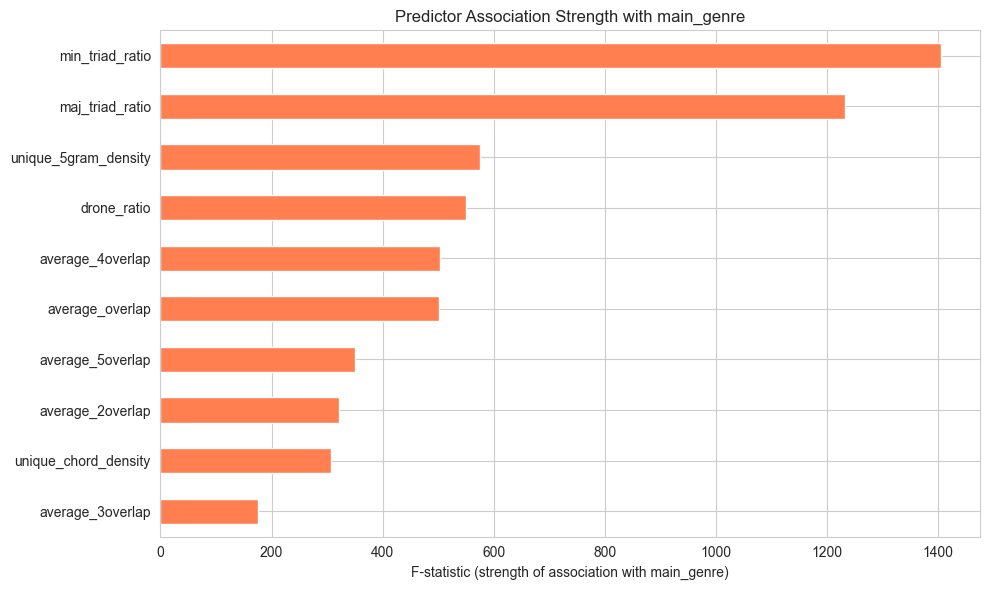

Target: spotify_popularity

Pearson Correlations (sorted by absolute value):
  maj_triad_ratio          : r= -0.123, p=0.0000
  min_triad_ratio          : r=  0.106, p=0.0000
  unique_5gram_density     : r= -0.096, p=0.0000
  average_4overlap         : r=  0.086, p=0.0000
  unique_chord_density     : r= -0.058, p=0.0000
  average_overlap          : r=  0.047, p=0.0000
  average_3overlap         : r=  0.026, p=0.0000
  drone_ratio              : r=  0.012, p=0.0000
  average_2overlap         : r= -0.009, p=0.0001
  average_5overlap         : r=  0.007, p=0.0021


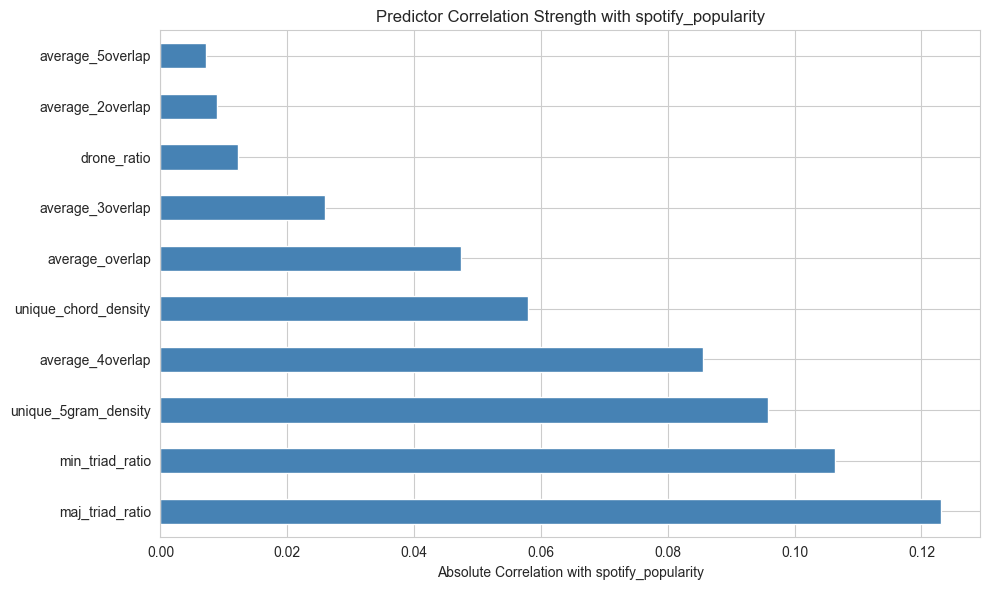

Target: on_hot100

ANOVA F-statistics (categorical target):
  drone_ratio              : F=   0.23, p=0.6300
  average_overlap          : F= 108.18, p=0.0000
  average_2overlap         : F= 115.14, p=0.0000
  average_3overlap         : F=   2.98, p=0.0845
  average_4overlap         : F=  43.25, p=0.0000
  average_5overlap         : F=  29.18, p=0.0000
  maj_triad_ratio          : F=  25.41, p=0.0000
  min_triad_ratio          : F=  92.86, p=0.0000
  unique_5gram_density     : F=   4.38, p=0.0364
  unique_chord_density     : F=   3.62, p=0.0572


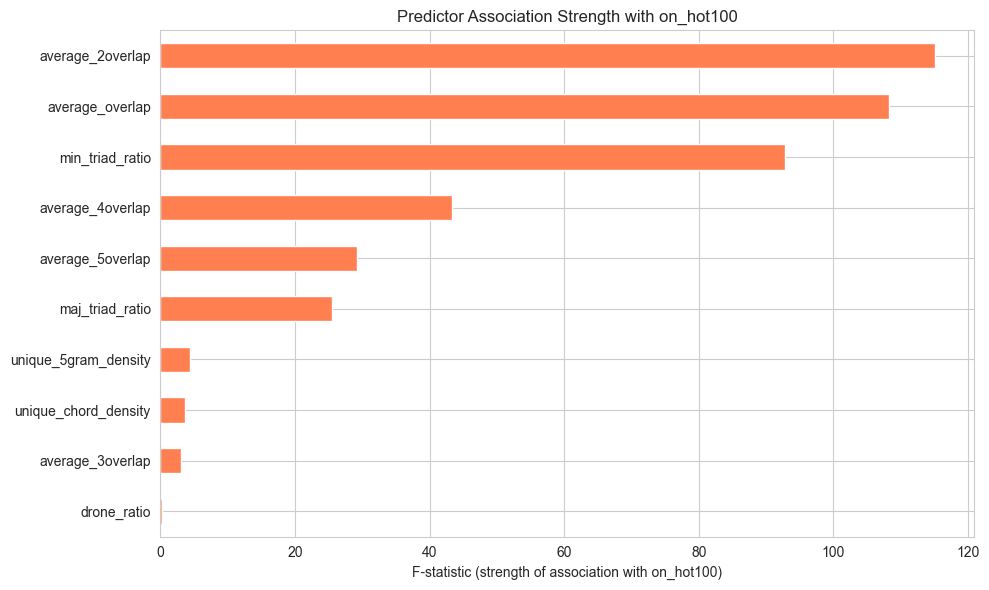

In [9]:
# Analyze correlation between predictors and each target variable

for target in target_variables_list:

    print(f"Target: {target}")

    # Filter out rows with missing values for this target
    data_clean = data_all[[target] + predictor_variables_list].dropna()

    # Check if target is numeric or categorical
    if target == "spotify_popularity":
        # For numeric targets: use Pearson correlation
        correlations = data_clean[predictor_variables_list].corrwith(data_clean[target])
        correlations_sorted = correlations.abs().sort_values(ascending=False)

        print(f"\nPearson Correlations (sorted by absolute value):")
        corr_results = {}
        for pred in predictor_variables_list:
            corr_coef, p_val = pearsonr(data_clean[pred], data_clean[target])
            corr_results[pred] = (corr_coef, p_val)

        # Sort by absolute correlation value
        sorted_preds = sorted(corr_results.items(), key=lambda x: abs(x[1][0]), reverse=True)

        for pred, (corr_val, p_val) in sorted_preds:
            print(f"  {pred:25s}: r={corr_val:7.3f}, p={p_val:.4f}")

        # Visualize
        plt.figure(figsize=(10, 6))
        correlations_sorted.plot(kind='barh', color='steelblue')
        plt.xlabel('Absolute Correlation with ' + target)
        plt.title(f'Predictor Correlation Strength with {target}')
        plt.tight_layout()
        plt.show()

    else:
        # For categorical targets: use ANOVA

        print(f"\nANOVA F-statistics (categorical target):")
        f_stats = {}

        for pred in predictor_variables_list:
            groups = [data_clean[data_clean[target] == cat][pred].values
                     for cat in data_clean[target].unique()]
            f_stat, p_val = f_oneway(*groups)
            f_stats[pred] = (f_stat, p_val)
            print(f"  {pred:25s}: F={f_stat:7.2f}, p={p_val:.4f}")

        # Visualize F-statistics
        f_values = {k: v[0] for k, v in f_stats.items()}
        plt.figure(figsize=(10, 6))
        pd.Series(f_values).sort_values().plot(kind='barh', color='coral')
        plt.xlabel(f'F-statistic (strength of association with {target})')
        plt.title(f'Predictor Association Strength with {target}')
        plt.tight_layout()
        plt.show()

In [32]:
print("\nFor decade and genre: higher F statistics indicate stronger associations between predictors and categorical targets. The high F statistics could be due to the large number of songs.")
print("The above results show that the F statistics are statistically significant (p < 0.05) indicating a presence of associations.")
print("\nFor popularity: the Pearson correlation coefficients are weak but statistically significant.")


For decade and genre: higher F statistics indicate stronger associations between predictors and categorical targets. The high F statistics could be due to the large number of songs.
The above results show that the F statistics are statistically significant (p < 0.05) indicating a presence of associations.

For popularity: the Pearson correlation coefficients are weak but statistically significant.
